In [6]:
import collections
import glob
import itertools
import json
import operator
import os
import re

import natsort
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

from seq2struct.utils import evaluation

In [3]:
os.chdir('..')

In [10]:
accuracy_per_run = collections.defaultdict(dict)
rows = []
for d in sorted(glob.glob('logdirs/20190425-django-allmatches-anysplit-multimean/*')):
    exp_name = os.path.basename(d)
    filt, cov, nt = exp = re.match('filt-([^_]+)_st-([^_]+)_nt-([^_]+)', exp_name).groups()

    infer_paths = glob.glob(os.path.join(d, 'infer-val-step*-bs1.jsonl'))
    all_scores = []
    for infer_path in infer_paths:
        num_lines = sum(1 for line in open(infer_path))
        if num_lines != 1000:
            continue
        step = int(re.search('step(\d+)', infer_path).group(1))
        _, metrics = evaluation.compute_metrics(
            'configs/django/nl2code.jsonnet', '', 'val', infer_path)
        all_scores.append((step, metrics['exact match']))
    
    all_scores.sort(key=operator.itemgetter(0))
    sorted_scores = sorted(all_scores, reverse=True, key=operator.itemgetter(1))
    rows.append(exp + (len(all_scores),) + (sorted_scores[0] if sorted_scores else (-1, -1)))
    accuracy_per_run[exp_name] = {
        'x': [s[0] for s in all_scores],
        'all': [s[1] for s in all_scores],
    }
    print(d)
    
df = pd.DataFrame(rows, columns=('filt', 'cov', 'nt', 'num steps eval', 'step', 'exact match'))

logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-examples_nt-10
logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-examples_nt-20
logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-examples_nt-40
logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-examples_nt-80
logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-xent_nt-10
logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-xent_nt-20
logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-xent_nt-40
logdirs/20190425-django-allmatches-anysplit-multimean/filt-contains-hole_st-cov-xent_nt-80
logdirs/20190425-django-allmatches-anysplit-multimean/filt-none_st-cov-examples_nt-10
logdirs/20190425-django-allmatches-anysplit-multimean/filt-none_st-cov-examples_nt-20
logdirs/20190425-django-allmatches-anysplit-multimean/filt-none_st-cov-examples_nt-4

In [15]:
df

,filt,cov,nt,num steps eval,step,exact match
0,contains-hole,cov-examples,10,40,22100,0.664
1,contains-hole,cov-examples,20,40,19100,0.659
2,contains-hole,cov-examples,40,40,32100,0.677
3,contains-hole,cov-examples,80,40,16100,0.655
4,contains-hole,cov-xent,10,40,28100,0.673
5,contains-hole,cov-xent,20,40,36100,0.665
6,contains-hole,cov-xent,40,40,17100,0.660
7,contains-hole,cov-xent,80,0,-1,-1.000
8,none,cov-examples,10,40,17100,0.664
9,none,cov-examples,20,40,24100,0.677


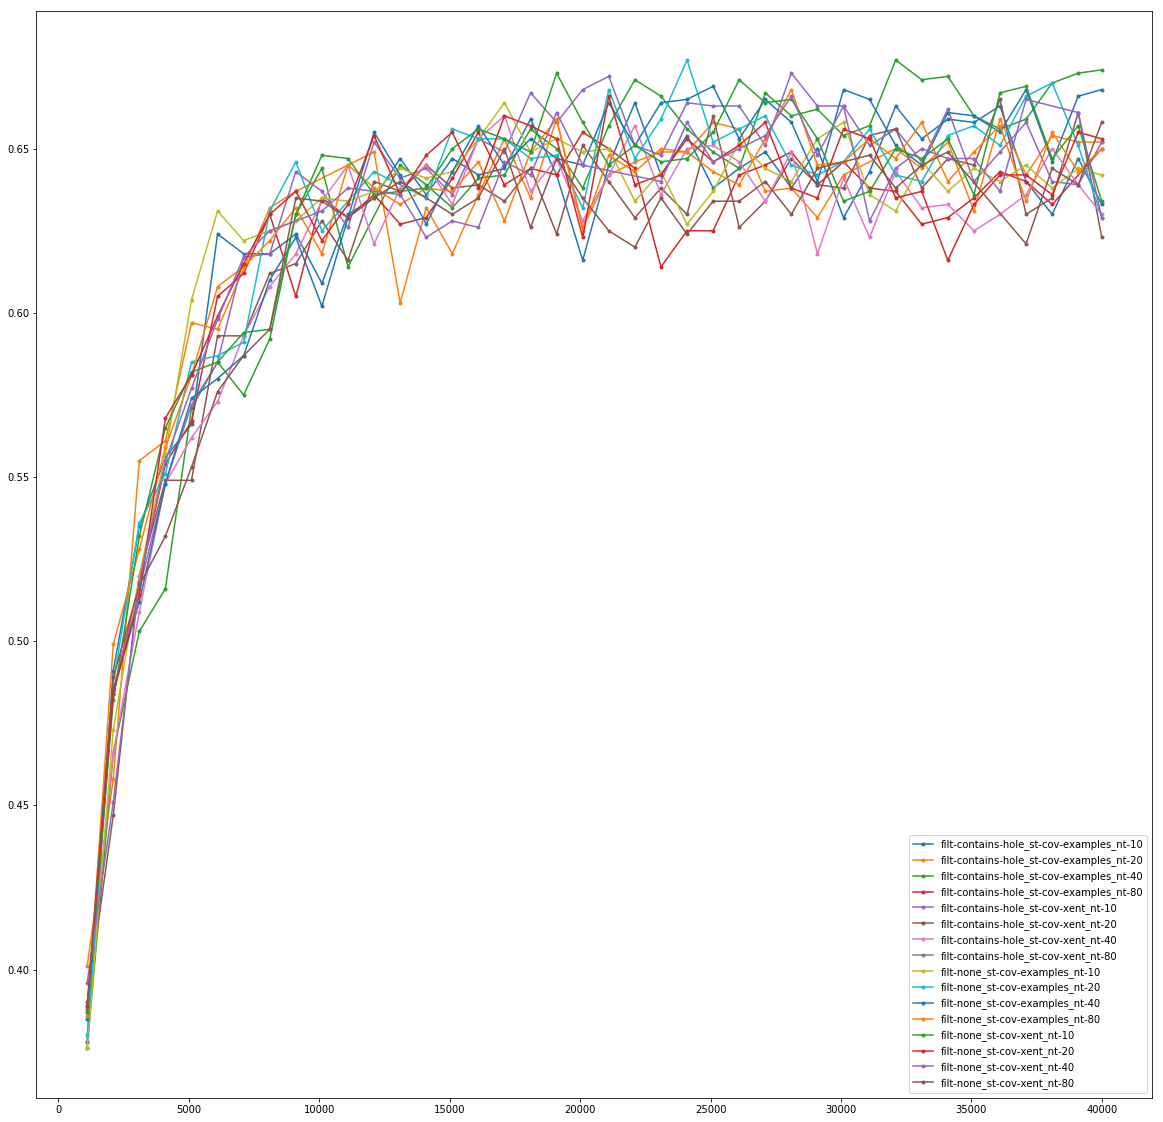

In [22]:
# See how accuracy varies over time
for k, v in sorted(accuracy_per_run.items()):
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()

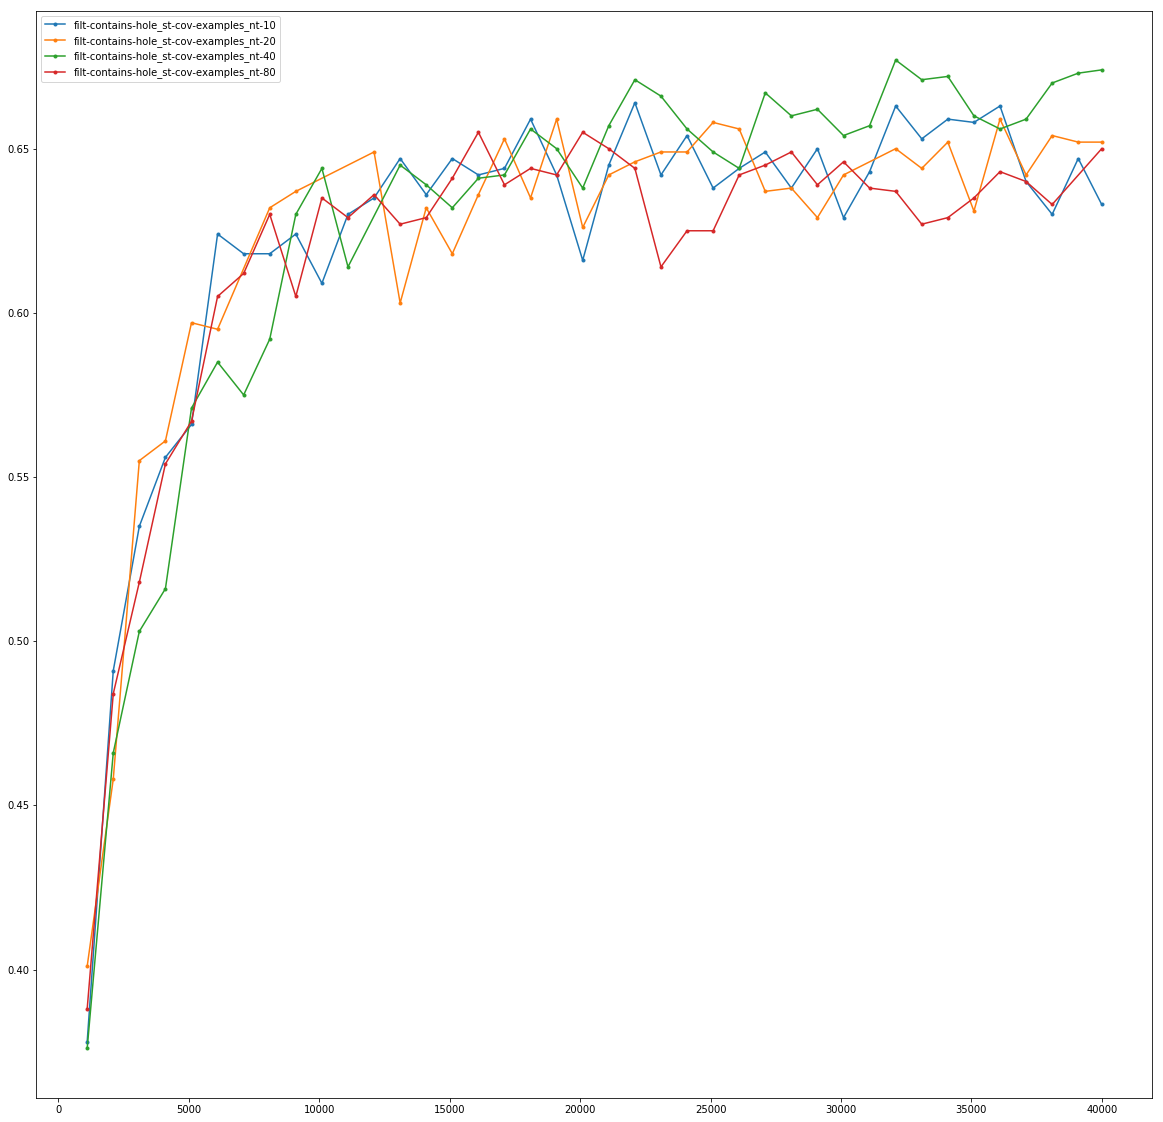

In [7]:
for k, v in sorted(accuracy_per_run.items())[:4]:
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()

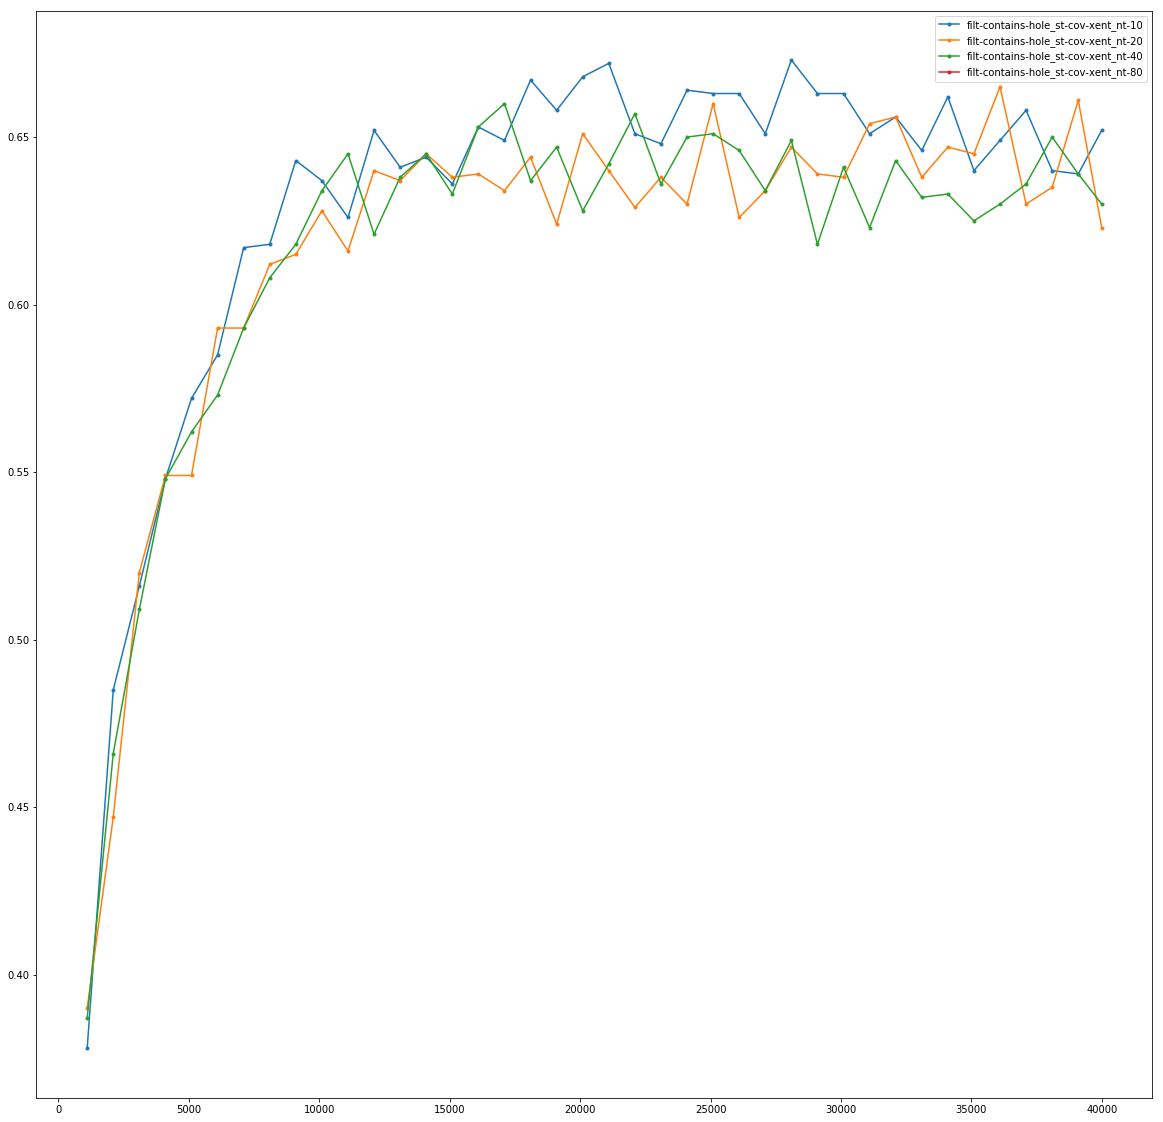

In [8]:
for k, v in sorted(accuracy_per_run.items())[4:8]:
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()

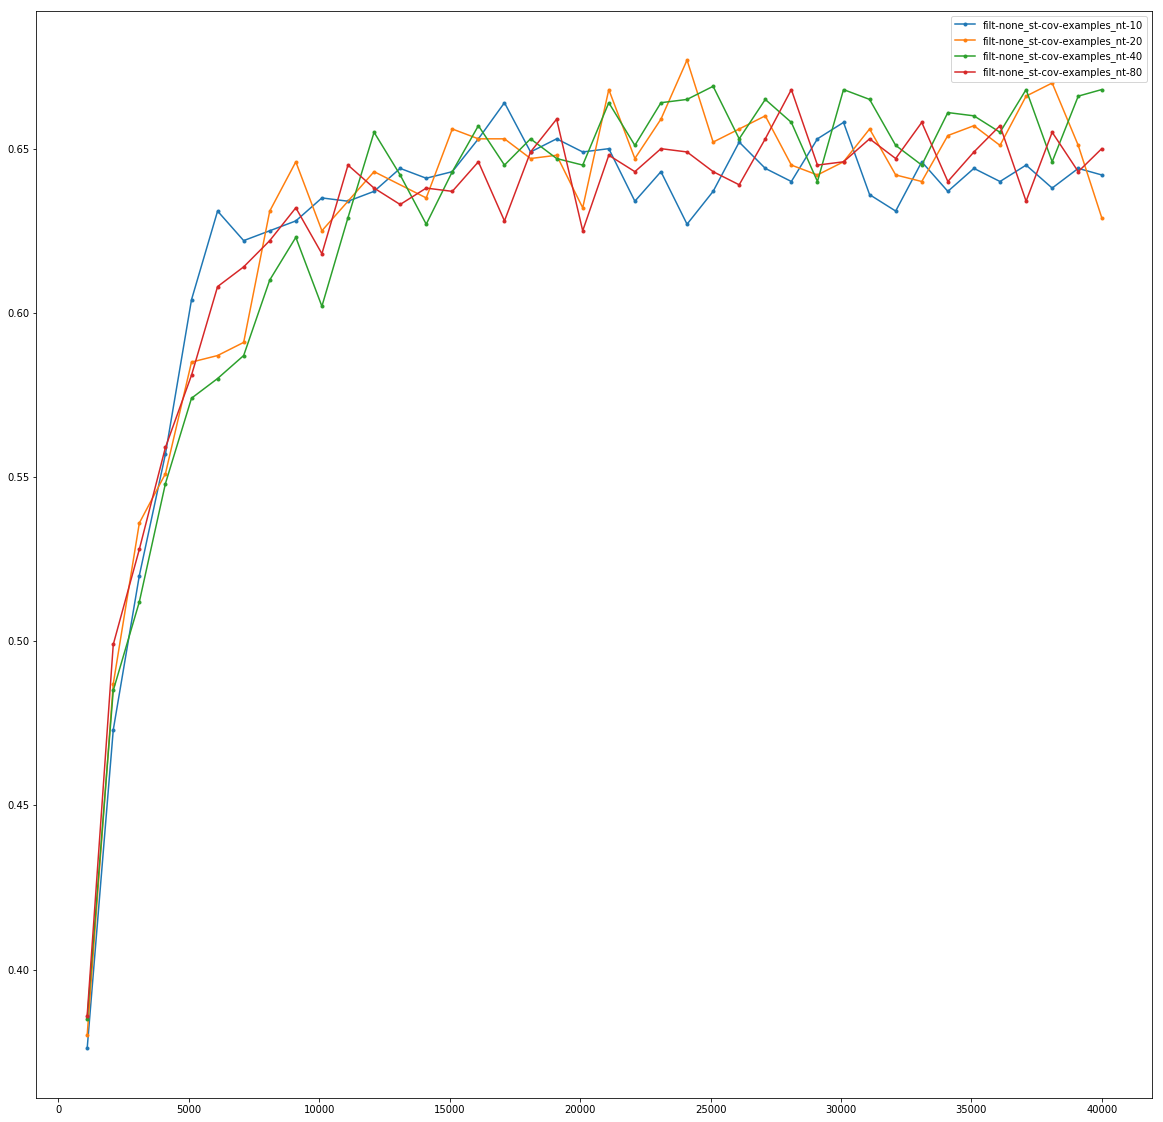

In [9]:
for k, v in sorted(accuracy_per_run.items())[8:12]:
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()